In [175]:
import numpy as np
import komm
import matplotlib.pyplot as plt
import copy as cp
import pandas as pd
import statsmodels.api as sm

In [176]:
nu = int(input('Number of Users = '))
u = [];
ml = int(input("Number of bits for each User= "))

Number of Users = 128
Number of bits for each User= 128


In [177]:
def nextpow2(n):
    return int(np.ceil(np.log2(n)))
    

In [178]:
hl = 2**nextpow2(nu)
u_binary = np.random.randint(low=0, high=2, size=(nu,ml))
u_binary

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 0]])

In [179]:
u_BPSK = u_binary*2 - 1
u_BPSK

array([[-1, -1, -1, ..., -1,  1, -1],
       [-1,  1, -1, ...,  1,  1,  1],
       [ 1, -1,  1, ...,  1,  1,  1],
       ...,
       [-1,  1, -1, ..., -1, -1, -1],
       [ 1,  1, -1, ...,  1, -1,  1],
       [-1,  1, -1, ..., -1,  1, -1]])

In [180]:
def WalshGenerator(code_length):
        
        code_length
        code=[[-1,-1],[-1,1]]
        [r1,c1]=np.shape(code)
        while r1<code_length:
            code=np.concatenate((code,code))
            code=np.concatenate((code,code),axis=1)
            for i in range(r1):
                for j in range(c1):
                    code[i+r1][j+c1]=-1*code[i][j]
            [r1, c1] = np.shape(code)
        return code
    
    


In [181]:
def Super_codes_(dim):
    a=np.array(WalshGenerator(dim))
    b=np.array(WalshGenerator(dim))
    d=np.array(WalshGenerator(dim))

    n1,n2=np.shape(a)
    c=np.array([])
    e=np.array([])
    t=np.array([])
    s_c=np.array([])
    eext=np.array([])
    for i in range(n1):
        for j in range(n1):
            c=np.append(c,b[j][i]*a[j][:])
    c=np.reshape(c,(n1,n1**2))
    for i in range(n1):
        for j in range(n1):
            dd=d[j][:]
            dd = np.tile(dd,n1)
            cc = c[i][:]
            mp=np.multiply(cc,dd)
            e=np.append(e,mp)
    e=np.reshape(e,(n1**2,n1**2))
    t=cp.copy(e)
    m1,m2=np.shape(t)
    td=np.array([])
    s_c=np.empty((2*n1**2,2*n1**2))
    for i in range(0,n1**2,2):
        td=np.vstack([t[i][:],t[i+1][:]])
        td=np.reshape(td,(1,2*n1**2), order='F')
        s_c[i*2]=td

        for j in range(2*n1**2):
            s_c[2*i+1][j]=(-1)**(j)*s_c[2*i][j]
        for k in range(0,2*n1**2-1,2):
            c1=s_c[2*i][k]
            c2=s_c[2*i][k+1]
            s_c[2*i+2][k]=c2
            s_c[2*i+2][k + 1]=c1
        for l in range(2*n1**2):
             s_c[2*i+3][l]=(-1)**(l)*s_c[2*i+2][l]
    np.shape(s_c)
    return (s_c)
def Super_codes(nu):
    c = 1
    code = Super_codes_(c)
    while code.shape[0] < nu:
        c += 1
        code = Super_codes_(c)
    return code

Super_codes(nu).shape
Super_codes(nu)

array([[-1., -1., -1., ..., -1.,  1., -1.],
       [-1.,  1., -1., ...,  1.,  1.,  1.],
       [-1., -1.,  1., ..., -1., -1.,  1.],
       ...,
       [-1.,  1., -1., ..., -1., -1., -1.],
       [-1., -1.,  1., ...,  1.,  1., -1.],
       [-1.,  1.,  1., ..., -1.,  1.,  1.]])

In [182]:
# def hadamard(code_length):
#     code_length=nu
#     code=[[-1,-1],[-1,1]]
#     [r1,c1]=np.shape(code)
#     while r1<code_length:
#         code=np.concatenate((code,code))
#         code=np.concatenate((code,code),axis=1)
#         for i in range(r1):
#             for j in range(c1):
#                 code[i+r1][j+c1]=-1*code[i][j]
#         [r1, c1] = np.shape(code)
#     return(-code)



In [183]:
def kron(A,B): #Kronecker tensor product.
#     print(A.shape, B.shape)
    ma,na = A.shape
    mb,nb = B.shape
    a = np.reshape(A, (1,ma, 1, na))
    b = np.reshape(B, (mb, 1, nb,1))
#     print(a)
#     print(b)
    return np.reshape(a*b, (ma*mb, na*nb))[0]


In [184]:
def cdmat(s,hl,cn):
    h = Super_codes(hl)
    if len(s.shape) < 2:
        S = np.reshape(s, (1,-1))
    else:
        S = s
    if len(h[cn,:].shape) < 2:
        H = np.reshape(h[cn,:], (1,-1))
    else:
        H = h[cn,:]
    return kron(S, H)


In [185]:
s = []
for n in range(nu):
    s.append(cdmat(u_BPSK[n,:], hl, n))
s = np.array(s)


In [186]:
cd1=np.reshape(sum(s), (1,-1));

In [187]:
def rectpulse(A, n):
    r = []
    a = np.reshape(A, (-1))
    for i in a:
        r.extend([i]*n)
    return np.reshape(np.array(r), (1,-1))


In [188]:
def intdump(A, n):
    r = []
    a = np.mean(np.reshape(A, (-1,4)), axis=1, keepdims=True)
    return a.T

In [189]:
def cdmar(s,hl, cn, ml):
    h =Super_codes(hl)
    scused = np.ones((1,ml))
    if len(scused.shape) < 2:
        S = np.reshape(scused, (1,-1))
    else:
        S = scused
    if len(h[cn,:].shape) < 2:
        H = np.reshape(h[cn,:], (1,-1))
    else:
        H = h[cn,:]
    bds = kron(S, H)
    ds = bds*s
#     print(ds.shape, bds.shape, s.shape)
    rds = np.reshape(ds, (hl,int(s.shape[1]/hl)))
    ou = sum(rds)
    t = len(ou)
    en = []
    for a in range(t):
        if ou[a] > 1:
            en.append(1)
        else:
            en.append(-1)
    return en

### Oversampling and Downsampling

In [198]:
loo = 0
cd = np.repeat(cd1, 4)
for SNR in range(-15,15, 2):
    loo += 1
    awgn = komm.AWGNChannel(snr=SNR, signal_power=10.0) #Add white Gaussian noise to a signal.
    t = awgn(cd)
    or_ = intdump(t,4)
    sr = []
    for p in range(nu):
        sr.append(cdmar(or_, hl, p, ml))
sr = np.array(sr)


In [199]:
binary_rx=((sr+1)/2).astype(int);

### Plot Combined Signals for Tx & Rx

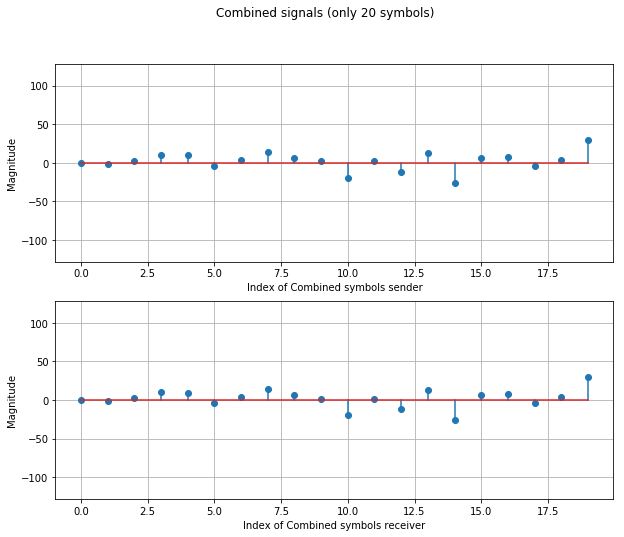

In [200]:
fig, axs = plt.subplots(2, figsize = (10,8))
fig.suptitle('Combined signals (only 20 symbols)')
axs[0].stem(cd1[0,0:20])
axs[0].set_xlabel('Index of Combined symbols sender');
axs[0].set_ylim(-nu,nu)
axs[0].set_ylabel('Magnitude');
axs[0].grid(True)

axs[1].stem(or_[0,0:20]);
axs[1].set_xlabel('Index of Combined symbols receiver');
axs[1].set_ylabel('Magnitude');
axs[1].set_ylim(-nu,nu)
axs[1].grid(True)
plt.savefig('Simu_Super_128_nu')

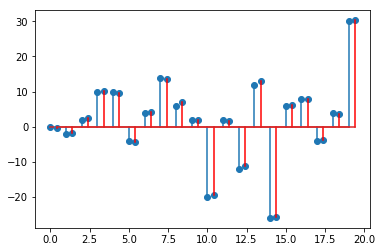

In [202]:
plt.stem(range(20), cd1[0,0:20]);
plt.stem([i+0.4 for i in range(20)], or_[0,0:20], linefmt='red');
plt.savefig('combined-simu_Super_128, SNR=1')

### Plot data for a randomly selected user such as user no. 1 before the BPSK mapping Tx and Rx 

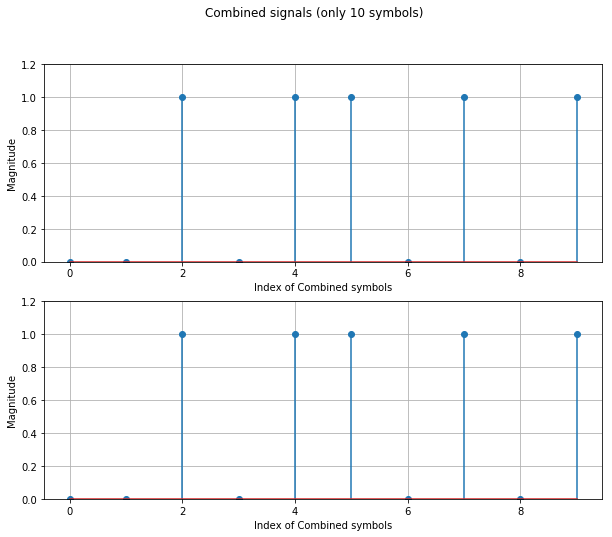

In [152]:
fig, axs = plt.subplots(2, figsize = (10,8))
fig.suptitle('Combined signals (only 10 symbols)')
axs[0].stem(u_binary[0,0:10])
axs[0].set_xlabel('Index of Combined symbols');
axs[0].set_ylim(0,1.2)
axs[0].set_ylabel('Magnitude');
axs[0].grid(True)
axs[1].stem((sr[0,0:10]+1)/2);
axs[1].set_xlabel('Index of Combined symbols');
axs[1].set_ylabel('Magnitude');
axs[1].set_ylim(0,1.2)
axs[1].grid(True)
fig.savefig  ('Before BPSK_Walsh_32')


### Plot data for a randomly selected user such as user no. 1 after the BPSK mapping Tx and Rx 

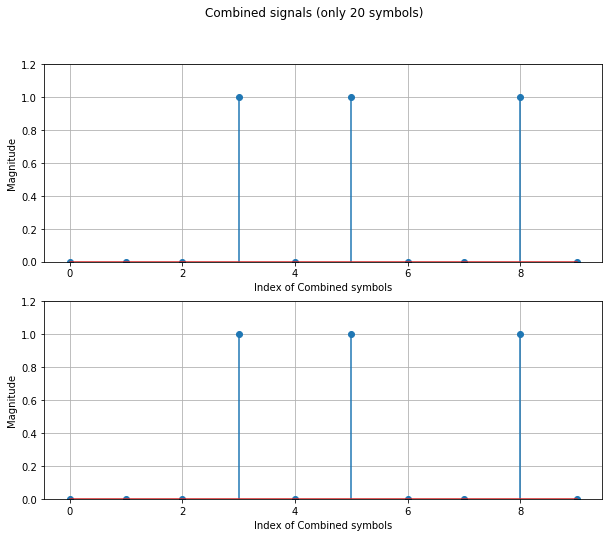

In [204]:
fig, axs = plt.subplots(2, figsize = (10,8))
fig.suptitle('Combined signals (only 20 symbols)')
axs[0].stem((u_BPSK[0,0:10]+1)/2)
axs[0].set_xlabel('Index of Combined symbols');
axs[0].set_ylim(0,1.2)
axs[0].set_ylabel('Magnitude');
axs[0].grid(True)
axs[1].stem((sr[0,0:10]+1)/2);
axs[1].set_xlabel('Index of Combined symbols');
axs[1].set_ylabel('Magnitude');
axs[1].set_ylim(0,1.2)
axs[1].grid(True)
plt.savefig('After_BPSK_Super_128')


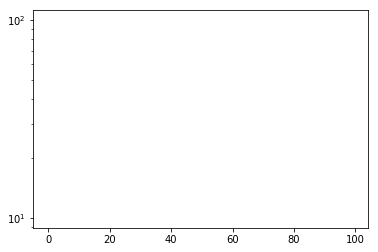

EbNodB: [-1. -1. -1.  1. -1. -1.  1. -1.]
Numbder of errors: [16686 16686 16686 12761 16686 16686 12761 16686]
Error probability: [0.16686 0.16686 0.16686 0.12761 0.16686 0.16686 0.12761 0.16686]
EbNodB: [-1.  1. -1. -1. -1.  1.  1.  1.]
Numbder of errors: [16707 12682 16707 16707 16707 12682 12682 12682]
Error probability: [0.16707 0.12682 0.16707 0.16707 0.16707 0.12682 0.12682 0.12682]
EbNodB: [-1. -1.  1. -1. -1. -1. -1.  1.]
Numbder of errors: [16821 16821 12784 16821 16821 16821 16821 12784]
Error probability: [0.16821 0.16821 0.12784 0.16821 0.16821 0.16821 0.16821 0.12784]
EbNodB: [-1.  1.  1.  1. -1.  1. -1. -1.]
Numbder of errors: [16854 12748 12748 12748 16854 12748 16854 16854]
Error probability: [0.16854 0.12748 0.12748 0.12748 0.16854 0.12748 0.16854 0.16854]
EbNodB: [-1. -1. -1.  1.  1.  1. -1.  1.]
Numbder of errors: [16844 16844 16844 12782 12782 12782 16844 12782]
Error probability: [0.16844 0.16844 0.16844 0.12782 0.12782 0.12782 0.16844 0.12782]
EbNodB: [-1.  1. -1.

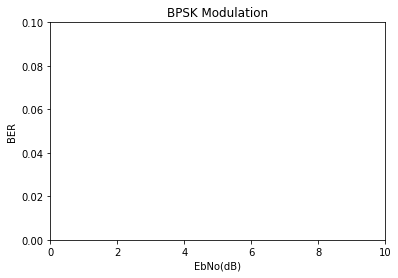

In [40]:
from numpy import sqrt
import random
import matplotlib.pyplot as plt
 
N = Super_codes(nu)

EbNodB_range = Super_codes(nu)   #range(0, 11)
itr = len(EbNodB_range)
ber = [None]*itr
tx_symbol = 0
noise = 0 
ch_coeff = 0
rx_symbol = 0 
det_symbol = 0 

for n in range (0, itr): 
 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    noise_std = 1/sqrt(2*EbNo)
    noise_mean = 0
    
    no_errors = 0
    for m in range (0, N):
      tx_symbol = 2*random.randint(0,1)-1
      noise = random.gauss(noise_mean, noise_std)
      ch_coeff = sqrt(random.gauss(0,1)**2+random.gauss(0,1)**2)/sqrt(2)
      rx_symbol = tx_symbol*ch_coeff + noise
      det_symbol = 2 * (rx_symbol >= 0) - 1
      no_errors += 1*(tx_symbol != det_symbol)  
    
    ber[n] = no_errors / N
    print ("EbNodB:", EbNodB)
    print ("Numbder of errors:", no_errors)
    print ("Error probability:", ber[n])
        
plt.plot(EbNodB_range, ber, 'bo-')
plt.axis([0, 10, 0, 0.1])
#plt.xscale('linear')
#plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
#plt.grid(True)
plt.title('BPSK Modulation')
plt.show()